# <div align="center">Boston Crime Analysis EDA </div>

![Crime Logo](https://assets.penguinrandomhouse.com/wp-content/uploads/2015/12/02152125/PRH-True-Crime-List-1400x380.jpg)


Boston is one of the oldest municipalities in the United States, founded on the Shawmut Peninsula in 1630 by Puritan settlers from the English town of the same name. It was the scene of several key events of the American Revolution, such as the Boston Massacre, the Boston Tea Party, the Battle of Bunker Hill, and the Siege of Boston. Upon gaining U.S. independence from Great Britain, it continued to be an important port and manufacturing hub as well as a center for education and culture.


## Business understanding

Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.


We will analyse the data about following,

* What are the common types of crimes which occur?
* Which is the most affected neigbourhoods?
* Does crime vary based on weekdays and month?.


## Data understanding

The dataset is available in Kaggle at : https://kaggle.com/AnalyzeBoston/crimes-in-boston . 

However, we will be utilising the data downloaded from https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system  as it consists of latest data.

In [1]:
# We will import necessary packages required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows',100)

While reading data, we will define encodings and  parameter _'low_memory= False'_ as there is a dtype warning while reading data from file. The error is "DtypeWarning: Columns (2,6,12) have mixed types." I found a related article in stackoverflow. Please feel free to explore on same. https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [2]:
data=pd.read_csv('Datasets/Data.csv',encoding='latin-1',low_memory=False) # read the data

In [3]:
data.head() # inspect the data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,42.309718,-71.104294,"(42.30971800, -71.10429400)"


In [4]:
#we will drop 1st row as the data displays as Test
data.drop(0,inplace=True)
data.reset_index(drop=True).head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
1,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
2,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"
3,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,42.309718,-71.104294,"(42.30971800, -71.10429400)"
4,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,42.271616,-71.118074,"(42.27161600, -71.11807400)"


In [5]:
data.shape

(477280, 17)

In [6]:
#we will analyse data from 2016 to 2019
data = data.loc[data['YEAR'].isin([2016,2017,2018,2019])]

data.shape

(398053, 17)

### Prepare Data

If we want to use the data for exploratory analysis, one of the first preparation steps consists of cleaning and restructuring data. This helps us in the performance and saving memory.

In [7]:
#Analyse Data types
data.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

### Handling data and missing values.

We notice the columns needs to be converted to other data types while exploring. These are the columns that needs to be converted. We will handle the missing values and convert them. Converting data types accordingly, helps us in saving memory and performance in large datasets.

| Columns | DataTypes|
| :-------------|-----:|
|OFFENSE_CODE_GROUP |'Category'|
|DISTRICT    | 'Category'|
|OCCURRED_ON_DATE| 'Datetime'|
|DAY_OF_WEEK| 'Category'|
|UCR_PART|'Category'|
|Location| 'float64'|



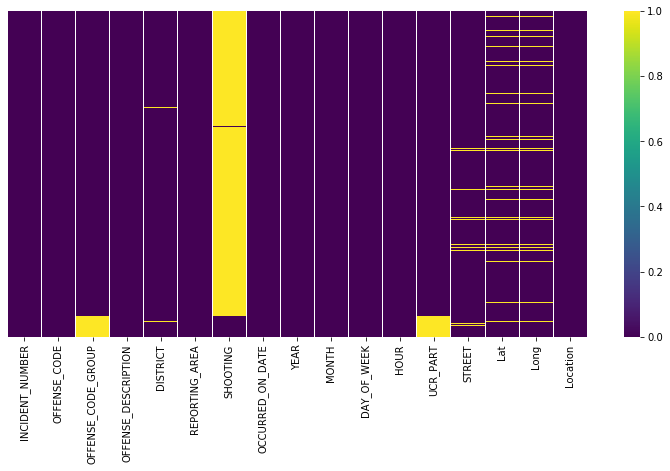

In [8]:
#Heatmap to identify the columns and missing values.

figure = plt.figure(figsize=(13,6))
sns.heatmap(data.isna(),yticklabels='',cmap='viridis');

We notice few columns are missing values. Lets check the percentage of same below.

In [9]:
#we will identify the columns which have missing values.
missing_columns=[col for col in data.columns if data[col].isna().sum()>0]

for col in missing_columns:
    print(f'{col} : {np.round(data[col].isna().sum()/data.shape[0]*100,2)}%')

OFFENSE_CODE_GROUP : 6.23%
DISTRICT : 0.55%
SHOOTING : 93.39%
UCR_PART : 6.26%
STREET : 3.41%
Lat : 6.42%
Long : 6.42%


In [10]:
#Replace missing values 

data['SHOOTING'].fillna('N',inplace=True) # since no shooting we will assume it as N
data['Lat'].replace(-1,None,inplace=True) # Will replace -1 with Nan.
data['Long'].replace(-1,None,inplace=True)# Will replace -1 with Nan.

#We will drop the missing values
data.dropna(inplace=True)
data.shape

(344933, 17)

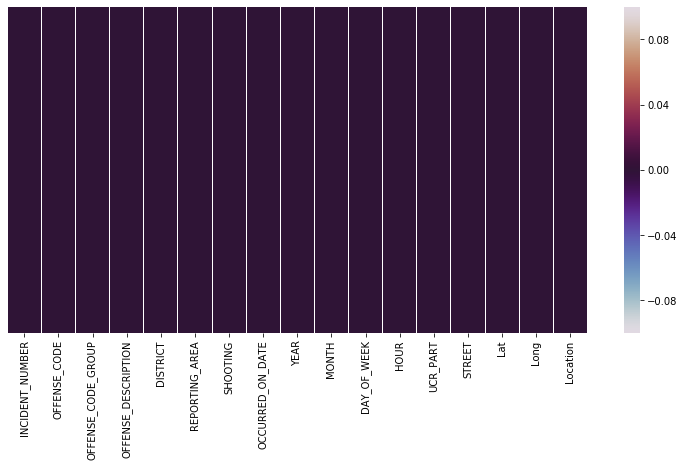

In [11]:
#Visualise, if any missing values exist.
figure = plt.figure(figsize=(13,6))
sns.heatmap(data.isna(),yticklabels='',cmap='twilight');

In [12]:
#Convert the data types
data['OCCURRED_ON_DATE']=pd.to_datetime(data['OCCURRED_ON_DATE'])

data['DAY_OF_WEEK']=pd.Categorical(data['DAY_OF_WEEK'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

data['OFFENSE_CODE_GROUP']=data['OFFENSE_CODE_GROUP'].astype('category')

data['DISTRICT']=data['DISTRICT'].astype('category')

month ={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

data.replace({'MONTH': month},inplace=True)

data['MONTH']=pd.Categorical(data['MONTH'], categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
              ordered=True)
# remove unwanted columns
data.drop(['OFFENSE_CODE','Location'],axis=1,inplace=True)

# Rename Column Names to readable format
data.rename(columns={'INCIDENT_NUMBER':'Incident Number','OFFENSE_CODE_GROUP':'Group',
                     'OFFENSE_DESCRIPTION':'Offense Description','DISTRICT':'District',
                    'REPORTING_AREA':'Reporting Area','SHOOTING':'Shooting',
                    'OCCURRED_ON_DATE':'Occured On Date','YEAR':'Year','MONTH':'Month',
                    'DAY_OF_WEEK':'Day Of Week','HOUR':'Hour','UCR_PART':'UCR Part','STREET':'Street'},inplace=True)

data.sample(1) # Columns looks readable.

,Incident Number,Group,Offense Description,District,Reporting Area,Shooting,Occured On Date,Year,Month,Day Of Week,Hour,UCR Part,Street,Lat,Long
204601,I172074299,Simple Assault,ASSAULT SIMPLE - BATTERY,D4,171,N,2017-09-07 19:55:00,2017,Sep,Thursday,19,Part Two,ALBANY ST,42.334288,-71.072395


##  Modelling - Exploratory Data Analysis

We will explore the dataset to analyse the occurances of the crime. We will check if there is any relation between the crimes and neighbourhood. We will check if date and time has any relation with the crimes.

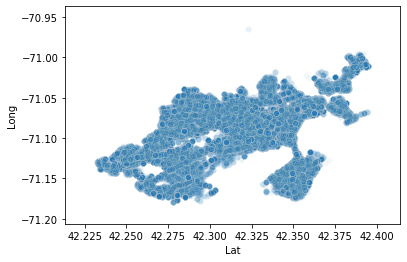

In [13]:
#Simple Scatter plot to see spread of crimes
sns.scatterplot('Lat','Long',alpha=0.05,data=data);

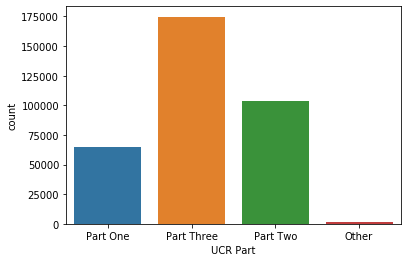

In [14]:
#Count the type of Crimes based on Uniform Crime Reporting(UCR)
sns.countplot(x='UCR Part',data=data);

The crime reported by Uniform Crime Reporting (UCR) Part Three is considerably more.

In [15]:
#Function to Plot Map

def plot_map(col):
    
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
    
    sns.countplot(x=col,data=data,ax=ax[0]);
    ax[0].set_title('Comparison');
    ax[0].set_ylabel('Crime Count')

    sns.countplot(x=col,data=data,hue='UCR Part',ax=ax[1]);
    ax[1].set_title('Comparison by Uniform Crime Reporting');
    ax[1].set_ylabel('Crime Count');
    
    fig.tight_layout();
    

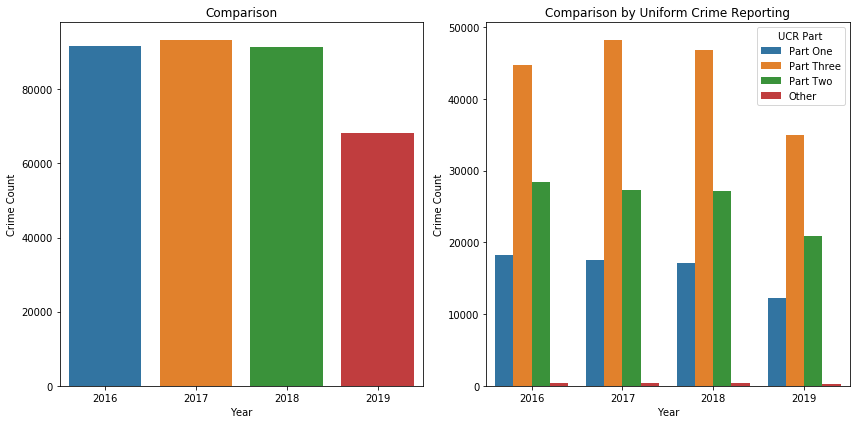

In [16]:
#Year Wise Analysis
plot_map(data['Year']);

There are less crimes reported in the year 2019. The crimes part of UCR 2 and 3 are significantly more.

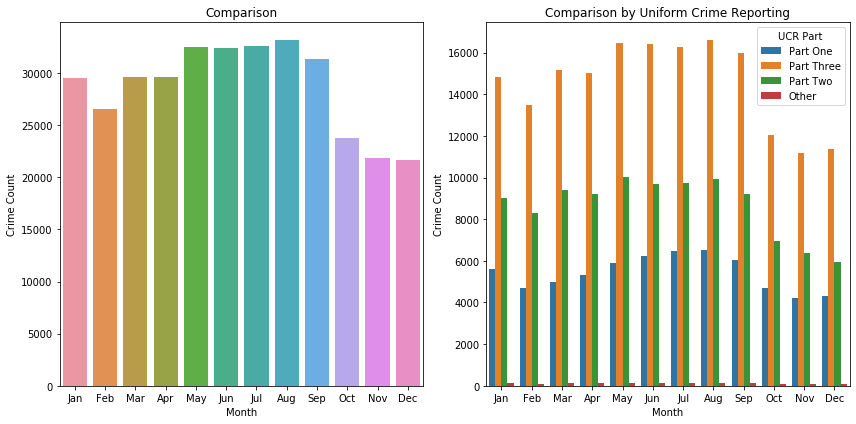

In [17]:
# Month Wise Analysis

plot_map(data['Month'])

Month wise comparison shows the crimes are more in spring and summer , less in winter.

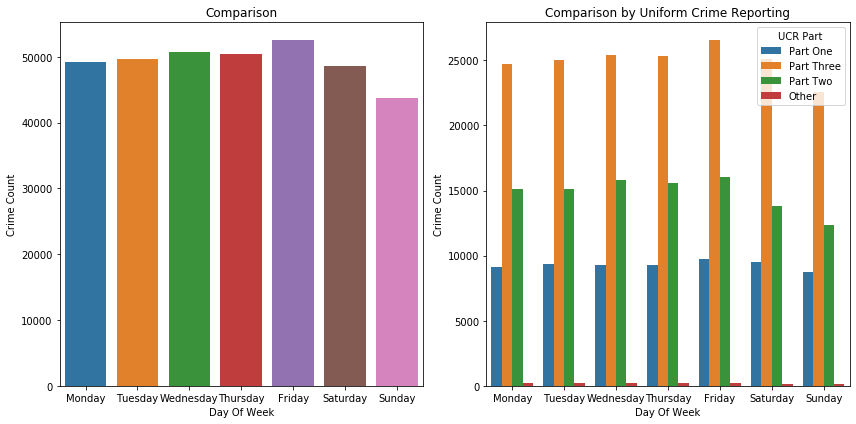

In [18]:
#Day Wise Comparison

plot_map(data['Day Of Week'])

Data shows crimes are more on fridays and less on sundays.

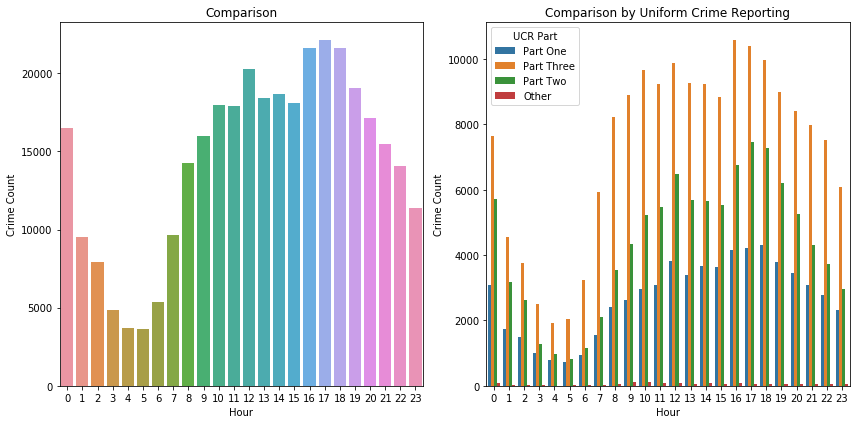

In [19]:
# Hour Wise Comparison

plot_map(data['Hour'])

The crime seems to be more in the evenings around 4pm to 6pm. There is a dip in crimes in early morning hours.

We notice that crimes which belong to 'Uniform Crime Reporting(UCR) Part Three' is more. We will look more closely on the severity and type of crimes involved in every District.

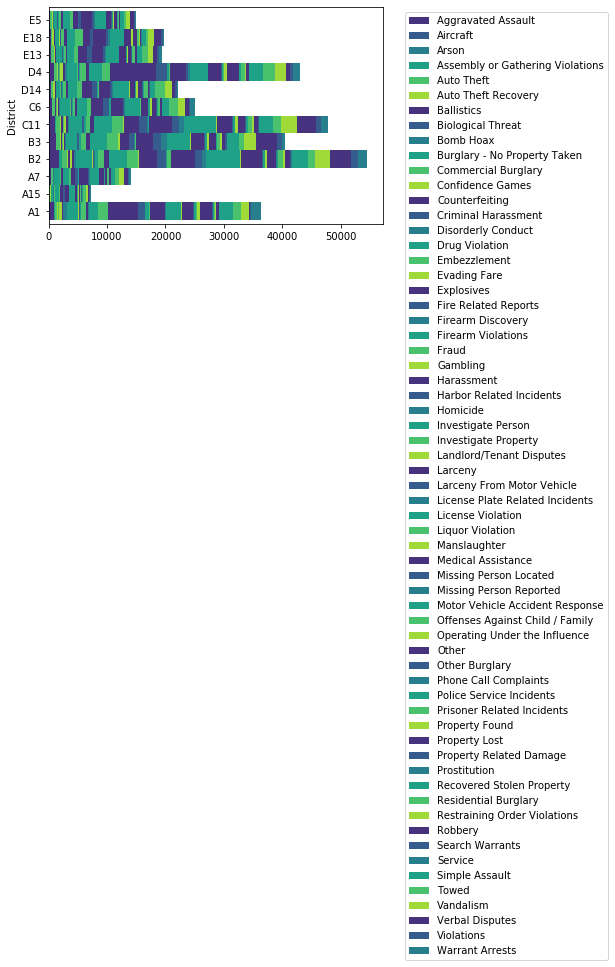

In [20]:
# We will Analyse the crimes district wise

pd.crosstab(data['District'],data['Group']).plot.barh(stacked=True,width=1,color=sns.color_palette('viridis'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);


We notice District A1,B2,C11 and D4 has more crimes reported.

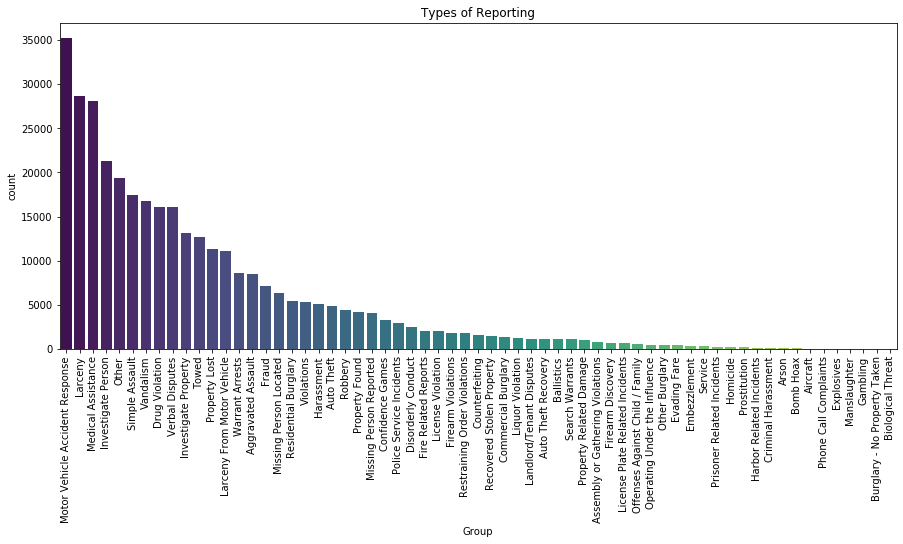

In [21]:
#Analyse most common crimes
plt.figure(figsize=(15,6))
sns.countplot('Group',data=data,order=data['Group'].value_counts().index,palette='viridis')
plt.xticks(rotation=90)
plt.title('Types of Reporting')
plt.show()

### Initial Observation

By looking at above plots, 

 * We notice Larcency,Simple Assault and Vandalism are commonly occured crimes.
 * We notice the crimes has been reduced in 2019. 
 * We notice the crimes are less in morning hours.
 * District A1,B2,C11 and D4 has more crimes reported.


We notice that  Accident Response,Medical Assistance , Investigate et.al are common occuring incidents. We need to  analyse crimes which are serious in nature, refering to Uniform Crime Reporting(UCR)  which provides us with the information. We will evaluate the data from 'UCR Part One' for further analysis.

## Evaluation

We will evaluate the data for Uniform Crime Reporting Part 1.

In [22]:
#We will filter only values for UCR Part 1
data_1=data[data['UCR Part']=='Part One']
data_1.shape

(65049, 15)

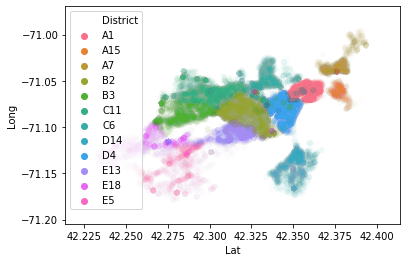

In [23]:
sns.scatterplot(x='Lat',y='Long',alpha=0.01,hue='District',data=data_1);

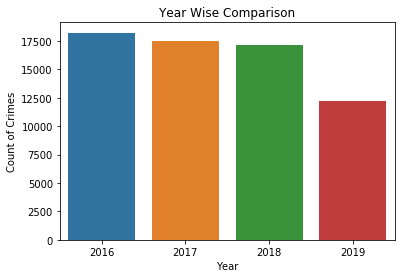

In [24]:
#Year Wise Analysis
sns.countplot(x='Year',data=data_1);
plt.title('Year Wise Comparison')
plt.ylabel('Count of Crimes');


In [25]:
# Function to plot map

def plot_count_map(col):
   
    sns.countplot(x=col,data=data_1,palette='viridis');
    plt.title('Comparison');
    plt.ylabel('Crime Count')
    plt.tight_layout()


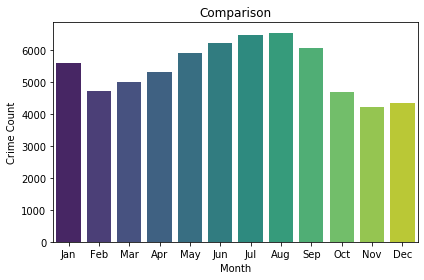

In [26]:
#Month Wise Analysis

plot_count_map(data_1['Month'])

Crimes are more in Spring and Summer.

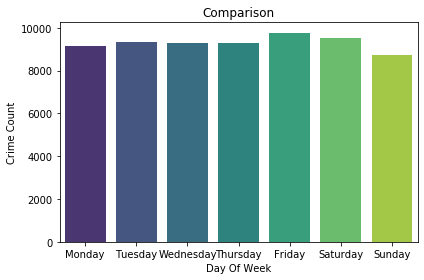

In [27]:
#Day Wise Analysis
plot_count_map(data_1['Day Of Week'])

Crimes are more on fridays and less on Sundays. (Is weekend party people easier targets? Staying home reduces Crimes?)

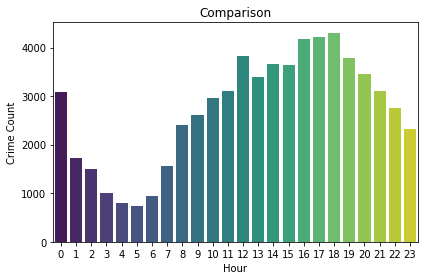

In [28]:
#Hour Wise Analysis
plot_count_map(data_1['Hour'])

Crimes occur usually in the evenings and less in the morning hours.

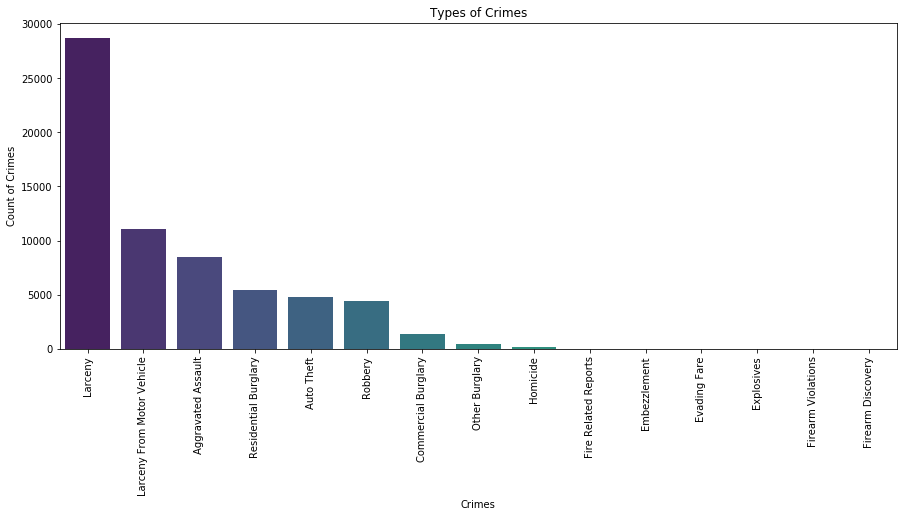

In [29]:
#Analyse most common crimes
plt.figure(figsize=(15,6))
sns.countplot('Group',data=data_1,order=data_1['Group'].value_counts().head(15).index,palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Crimes')
plt.ylabel('Count of Crimes')
plt.title('Types of Crimes')
plt.show()

We notice Larceny is the most common crime occuring, followed by aggravated Assault and resisential burglary.

## Evaluation - Boston City Crime Map

In [30]:
#We will import folium to show crime density.
import folium

In [31]:
#Need to map district code with respective districts
district_dict={'D14': 'Brighton','C11':'Dorchester','D4':'South End','B3':'Mattapan','B2':'Roxbury','C6':'South Boston',
 'A1':'Downtown','E5':'West Roxbury','A7':'East Boston','E13':'Jamaica Plain','E18':'Hyde Park','A15':'Charlestown'}

In [34]:
#We Would need to grp the data 

data_grp=data_1.groupby('District').count()
data_grp= pd.DataFrame(data_grp,columns=['Group'])  
data_grp.reset_index(inplace=True)   
data_grp.rename(columns={'District':'Neighborhood','Group':'Count'}, inplace=True)
data_grp.sort_values(by='Count', inplace=True, ascending=False)

#remap the district codes.
data_grp=data_grp.replace({'Neighborhood':district_dict})

geo_json = 'Datasets/Boston_Neighborhoods.geojson'

crime_density = folium.Map(location=[42.3125,-71.0875],zoom_start=12)

crime_density.choropleth(geo_data=geo_json,data=data_grp, columns=['Neighborhood','Count'],
       key_on='feature.properties.Name',
       fill_color='Oranges',
       fill_opacity='0.6',
       line_opacity='0.2',
       legend_name='Crime Rate in Boston, by Neighborhood')


crime_density

## Boston City Larceny Crime Map

In [33]:
#We will utilise folium Heatmaps
from folium.plugins import HeatMap

heat_map= folium.Map(location=[42.3125,-71.0875],zoom_start = 11)

location=data_1[data_1['Group']=='Larceny'][['Lat','Long']]

data_loc=location.values.tolist()
HeatMap(data_loc,radius=5).add_to(heat_map)

heat_map

## Final Conclusion

Based on the EDA in the notebook, 

* Larceny is the most common crime occuring in the Boston City.
* Crimes are lower in the early morning 3 am to 5 am and higher in the evenings from 4pm to 6pm.
* Crimes occurance are more on fridays and less on Sundays. 
* Crimes tends to increase in Spring and Summer, reduces in winter.
* Districts such as South End, Roxbury ,Downtown and Dorchester are most affected with crimes.


There are still multiple factors to analyse the crimes occurance. We can consider incident number to explore if multiple offense are tagged to single incident. We can explore the severity of crimes with Incident Id. 

The Uniform Crime reporting part 2 and 3 has more cases comparatively. We can explore other crimes individually like like Larceny.

The notebook is an initial analysis of data, we can still explore by using multiple datasets and factors.

Thanks for reading.